In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./src/network.csv') #CHECK YOUR OWN FOLDER!

In [6]:
df.head(1)

,LNCEL name,PERIOD_START_TIME,"E-RAB Stp Att, QCI2","E-RAB Stp Att, QCI3","E-RAB Stp Att, QCI4",Add E-RAB Stp Att,"E-RAB Stp Att, QCI1",Avg act UEs DL DRBs QCI1,Avg act UEs UL DRBs QCI1,Max Act UEs per cell DL,...,Max nr active UEs per cell,Max nr RRC conn UEs per cell,Avg Nr UEs UL intra-eNB CoMP,Avg CA capab UEs DL,Avg CA cap UEs for 3CCs DL,Avg UEs active SCell DL,Avg UEs activ 2 SCell DL,Avg Latency Uplink,Amount of active cells,target
0,WO09sL6,06.21.2019 22:00:00,0,0,0,0,0,0.0,0.0,2,...,7,7,0.0,1.11,0.92,0.0,0.0,0.0,1,0


In [7]:
df.columns

Index(['LNCEL name', 'PERIOD_START_TIME', 'E-RAB Stp Att, QCI2',
       'E-RAB Stp Att, QCI3', 'E-RAB Stp Att, QCI4', 'Add E-RAB Stp Att',
       'E-RAB Stp Att, QCI1', 'Avg act UEs DL DRBs QCI1',
       'Avg act UEs UL DRBs QCI1', 'Max Act UEs per cell DL',
       'Max Act UEs per cell UL', 'Max nr active UEs per cell',
       'Max nr RRC conn UEs per cell', 'Avg Nr UEs UL intra-eNB CoMP',
       'Avg CA capab UEs DL', 'Avg CA cap UEs for 3CCs DL',
       'Avg UEs active SCell DL', 'Avg UEs activ 2 SCell DL',
       'Avg Latency Uplink', 'Amount of active cells', 'target'],
      dtype='object')

In [8]:
# Max nr active UEs per cell
cells = df.pivot_table(index='LNCEL name', 
                       columns='PERIOD_START_TIME' , 
                       values='Max nr active UEs per cell' )

In [82]:
# To add more than one KPI 
cells2 = df.pivot_table(index='LNCEL name',
               columns='PERIOD_START_TIME',
               values=['Avg UEs activ 2 SCell DL', 'Max nr active UEs per cell'])

In [10]:
cells.head()

PERIOD_START_TIME,06.21.2019 22:00:00,06.22.2019 01:00:00,06.22.2019 02:00:00,06.22.2019 03:00:00,06.22.2019 04:00:00,06.22.2019 05:00:00,06.22.2019 06:00:00,06.22.2019 07:00:00,06.22.2019 08:00:00,06.22.2019 09:00:00,...,06.22.2019 13:00:00,06.22.2019 14:00:00,06.22.2019 15:00:00,06.22.2019 16:00:00,06.22.2019 17:00:00,06.22.2019 18:00:00,06.22.2019 19:00:00,06.22.2019 20:00:00,06.22.2019 21:00:00,06.22.2019 22:00:00
LNCEL name,,,,,,,,,,,,,,,,,,,,,
WO09sL6,7,5,5,5,4,5,5,6,8,9,...,9,11,11,12,12,9,8,8,11,9
WO09sL7,35,25,28,26,26,23,25,30,34,35,...,39,34,38,37,33,36,35,39,38,39
WO09sL8,9,8,7,6,8,7,6,7,12,16,...,23,22,23,26,27,25,19,15,14,11
WO09sLN6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WO09sLN7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


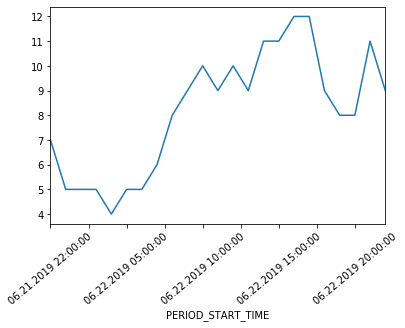

In [13]:
cells.iloc[0,:].plot(rot=40)

## Apply KMeans

In [17]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=5, random_state=42)

In [34]:
clusters = km.fit_predict(cells) # All the iteration, etc happens here

In [35]:
clusters

array([3, 2, 3, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 2, 2, 2, 3, 3, 0, 0, 0, 2, 2,
       3, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 0, 0, 1, 3, 3, 1, 0])

In [36]:
cells['Cluster'] = clusters

In [41]:
cells.head()

PERIOD_START_TIME,06.21.2019 22:00:00,06.22.2019 01:00:00,06.22.2019 02:00:00,06.22.2019 03:00:00,06.22.2019 04:00:00,06.22.2019 05:00:00,06.22.2019 06:00:00,06.22.2019 07:00:00,06.22.2019 08:00:00,06.22.2019 09:00:00,...,06.22.2019 14:00:00,06.22.2019 15:00:00,06.22.2019 16:00:00,06.22.2019 17:00:00,06.22.2019 18:00:00,06.22.2019 19:00:00,06.22.2019 20:00:00,06.22.2019 21:00:00,06.22.2019 22:00:00,Cluster
LNCEL name,,,,,,,,,,,,,,,,,,,,,
WO09sL6,7,5,5,5,4,5,5,6,8,9,...,11,11,12,12,9,8,8,11,9,3
WO09sL7,35,25,28,26,26,23,25,30,34,35,...,34,38,37,33,36,35,39,38,39,2
WO09sL8,9,8,7,6,8,7,6,7,12,16,...,22,23,26,27,25,19,15,14,11,3
WO09sLN6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WO09sLN7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


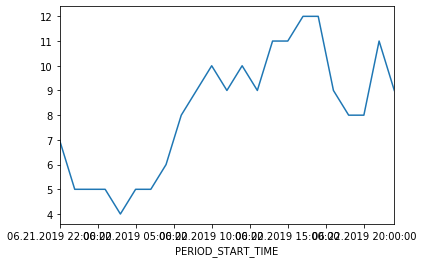

In [38]:
cells.iloc[0,:-1].plot()

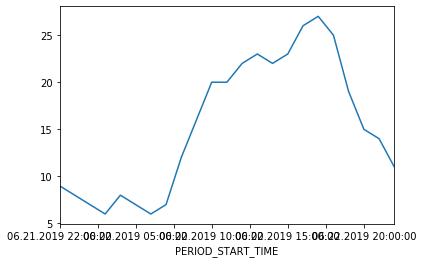

In [39]:
cells.iloc[2,:-1].plot()

### 1. Elbow method to determine k

In [42]:
km.inertia_

19610.574675324675

In [44]:
Ks = range(2, 20)
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(cells.iloc[:,:-1]) # Exclude the 'cluster' column
    inertias.append(km.inertia_)

Text(0, 0.5, 'Total inertia')

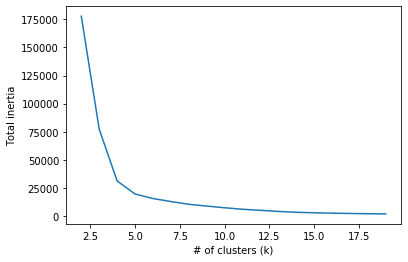

In [45]:
plt.plot(Ks, inertias)
plt.xlabel('# of clusters (k)')
plt.ylabel('Total inertia')

In [48]:
inertias

[177731.3894736842,
 77297.84362934364,
 31190.386486486488,
 19597.217532467534,
 15539.10806451613,
 12870.035842293906,
 10404.154889912956,
 8844.654889912956,
 7326.654889912955,
 6004.990207373272,
 5042.233974358975,
 4081.150641025641,
 3292.0565934065935,
 2877.425641025641,
 2511.075641025641,
 2234.9089743589743,
 2016.2923076923075,
 1846.7589743589742]

### Question: Can we automate finding that value of k?

In [61]:
pct_change = np.diff(inertias) / inertias[1:]*100 #Percentage change from one value to the next

In [62]:
pct_change

array([-129.93059202, -147.82586026,  -59.15721931,  -26.11545947,
        -20.73865415,  -23.70092505,  -17.63211815,  -20.71886861,
        -22.00943943,  -19.09384289,  -23.54932268,  -23.96963798,
        -14.40978861,  -14.58936537,  -12.35695368,  -10.84250859,
         -9.18004654])

In [63]:
second_deriv = np.diff(pct_change)/pct_change[1:]

In [64]:
second_deriv

array([ 0.12105641, -1.49886425, -1.2652184 , -0.25926491,  0.12498545,
       -0.34419046,  0.14898258,  0.05863715, -0.15269826,  0.18919779,
        0.01753532, -0.66342745,  0.01230874, -0.18066036, -0.13967663,
       -0.18109517])

In [65]:
np.round(second_deriv)

array([ 0., -1., -1., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -1.,  0.,
       -0., -0., -0.])

In [66]:
km = KMeans(n_clusters=4, random_state=42)
cells['Cluster'] = km.fit_predict(cells.iloc[:,:-1])

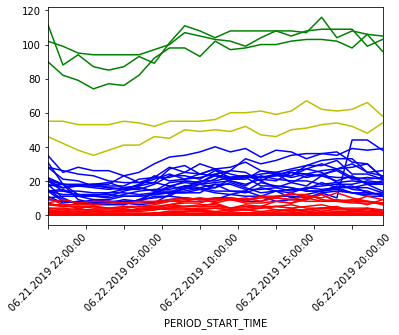

In [67]:
colors = ['b','g','r','y']
for k in range(4):
    idxs = np.where(cells['Cluster']==k)[0] # find cells idx for each cluster
    for idx in idxs:
        cells.iloc[idx,:-1].plot(c=colors[k], rot=45)
    

In [73]:
df.head()

,LNCEL name,PERIOD_START_TIME,"E-RAB Stp Att, QCI2","E-RAB Stp Att, QCI3","E-RAB Stp Att, QCI4",Add E-RAB Stp Att,"E-RAB Stp Att, QCI1",Avg act UEs DL DRBs QCI1,Avg act UEs UL DRBs QCI1,Max Act UEs per cell DL,...,Max nr active UEs per cell,Max nr RRC conn UEs per cell,Avg Nr UEs UL intra-eNB CoMP,Avg CA capab UEs DL,Avg CA cap UEs for 3CCs DL,Avg UEs active SCell DL,Avg UEs activ 2 SCell DL,Avg Latency Uplink,Amount of active cells,target
0,WO09sL6,06.21.2019 22:00:00,0,0,0,0,0,0.00,0.0,2,...,7,7,0.0,1.11,0.92,0.0,0.0,0.0,1,0
1,WO09sL6,06.22.2019 01:00:00,0,0,0,0,0,0.11,0.0,2,...,5,5,0.0,0.68,0.39,0.0,0.0,0.0,1,0
2,WO09sL6,06.22.2019 02:00:00,0,0,0,0,0,0.00,0.0,2,...,5,5,0.0,0.52,0.36,0.0,0.0,0.0,1,0
3,WO09sL6,06.22.2019 03:00:00,0,0,0,0,0,0.00,0.0,2,...,5,5,0.0,0.54,0.46,0.0,0.0,0.0,1,0
4,WO09sL6,06.22.2019 04:00:00,0,0,0,0,0,0.00,0.0,2,...,4,4,0.0,0.44,0.35,0.0,0.0,0.0,1,0


In [83]:
cells.groupby('Cluster').mean()

PERIOD_START_TIME,06.21.2019 22:00:00,06.22.2019 01:00:00,06.22.2019 02:00:00,06.22.2019 03:00:00,06.22.2019 04:00:00,06.22.2019 05:00:00,06.22.2019 06:00:00,06.22.2019 07:00:00,06.22.2019 08:00:00,06.22.2019 09:00:00,...,06.22.2019 13:00:00,06.22.2019 14:00:00,06.22.2019 15:00:00,06.22.2019 16:00:00,06.22.2019 17:00:00,06.22.2019 18:00:00,06.22.2019 19:00:00,06.22.2019 20:00:00,06.22.2019 21:00:00,06.22.2019 22:00:00
Cluster,,,,,,,,,,,,,,,,,,,,,
0,18.950000,15.100000,13.700000,13.200000,12.950000,13.200000,13.950000,15.750000,17.900000,18.950000,...,20.500000,20.000000,20.300000,20.250000,20.850000,22.200000,22.300000,22.900000,21.550000,19.750000
1,101.333333,89.666667,89.333333,85.000000,85.333333,85.666667,89.666667,92.666667,99.666667,105.333333,...,101.666667,104.000000,105.333333,105.000000,106.000000,109.333333,105.000000,105.000000,103.666667,101.333333
2,1.567568,1.351351,1.243243,1.081081,1.081081,1.135135,1.270270,1.432432,1.810811,2.000000,...,1.945946,2.108108,2.243243,2.243243,2.243243,2.324324,2.081081,1.837838,1.783784,1.594595
3,50.500000,48.500000,45.500000,44.000000,45.500000,48.000000,47.500000,49.000000,50.000000,52.500000,...,56.000000,54.000000,52.500000,55.500000,59.000000,57.500000,57.500000,57.000000,57.000000,56.000000
